# surprise 라이브러리 설치

In [5]:
conda install -c conda-forge scikit-surprise

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sehyu\anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-surprise-1.1.0      |py37hc8d92b1_1001         608 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         608 KB

The following NEW packages will be INSTALLED:

  scikit-surprise    conda-forge/win-64::scikit-surprise-1.1.0-py37hc8d92b1_1001




scikit-surprise-1.1. | 608 KB    |            |   0% 
scikit-surprise-1.1. | 608 KB    | ########9  |  89% 
scikit-surprise-1.1. | 608 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


# 패키지 불러오기

In [1]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import sqlite3
import surprise
import pymysql
warnings.filterwarnings('ignore')

# 저장된 meetings와 moim 데이터 불러오기와서 합침

In [7]:
meetings = pd.read_csv('./meeting_data.csv')
moim = pd.read_csv('./moim_data.csv')
df = pd.concat([meetings, moim])
df

,meeting_id,uid,writer,created_at,updated_at,is_period,meeting_date,period_date,is_class,max_person,...,unit,is_active,like_cnt,view_cnt,score,main_category,tags,title,area1,area2
0,108923,https://www.frip.co.kr/hosts/617,그 아저씨,2020-05-30 20:58:48.363822,2020-05-30 20:58:48.363822,0,2020-05-30 20:58:48.363822,NaN,1,20,...,원,1,11222,0,4.77,0,NaN,[널위한선물] 도예 공방 원데이 / 도자기 그릇 만들기 (예약가능),서울시,성동구
1,133413,https://www.frip.co.kr/hosts/5545,MCJ,2020-05-30 20:58:52.561736,2020-05-30 20:58:52.561736,0,2020-06-03 19:30:00.000000,NaN,1,20,...,원,1,265,0,5.00,0,NaN,BYOB 각자 와인 1병씩 가져오는 MCJ 홈파티,서울시,강남구
2,101774,https://www.frip.co.kr/hosts/746,아이홉 맥주공방 (I'HOP),2020-05-30 20:58:55.192702,2020-05-30 20:58:55.192702,0,2020-05-31 13:00:00.000000,NaN,1,20,...,원,1,9848,0,4.76,0,NaN,[가정의달] 술술 놀면서 수제 맥주 만들기,서울시,송파구
3,133023,https://www.frip.co.kr/hosts/10654,비푸머스,2020-05-30 20:58:58.940685,2020-05-30 20:58:58.940685,0,2020-05-30 20:58:58.940685,NaN,1,20,...,원,1,888,0,4.81,0,NaN,[서울/홍대] 최상급 프랑스 향료로 나만의 향수 만들기 (예약 가능),서울시,마포구
4,115497,https://www.frip.co.kr/hosts/2839,지아네요리공작소,2020-05-30 20:59:02.833314,2020-05-30 20:59:02.833314,0,2020-05-30 20:59:02.833314,NaN,1,20,...,원,1,5674,0,4.89,0,NaN,[망원동] 스콘 2종 원데이클래스 (예약 가능),서울시,마포구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,135609,https://www.frip.co.kr/hosts/11305,박초롱,2020-05-30 17:59:18.149290,2020-05-30 17:59:18.149290,0,2020-06-09 19:30:00.000000,NaN,1,20,...,원,1,66,0,0.00,0,NaN,[4회] 프로N잡러와 함께 - 언젠가 프리랜서,서울,마포구
158,134752,https://www.frip.co.kr/hosts/11160,아페리,2020-05-30 17:59:24.630295,2020-05-30 17:59:24.630295,0,2020-06-06 19:00:00.000000,NaN,1,20,...,원,1,118,0,5.00,0,NaN,2030 직장인 소셜 네트워킹 와인 파티,서울시,중구
159,133251,https://www.frip.co.kr/hosts/10766,수오재기,2020-05-30 17:59:31.681293,2020-05-30 17:59:31.681293,0,2020-06-16 00:00:00.000000,NaN,1,20,...,원,1,64,0,4.90,0,NaN,"15일 _ 토닥토닥, 나 칭찬하기",생활은,"일상에서,"
160,128055,https://www.frip.co.kr/hosts/5493,에스프레소,2020-05-30 17:59:38.988290,2020-05-30 17:59:38.988290,0,2020-06-05 19:45:00.000000,NaN,1,20,...,원,1,415,0,4.71,0,NaN,[여자 추가모집] 완벽한 타인,서울시,강남구


In [8]:
meeting_images = pd.read_csv('./meeting_images.csv')
moim_images = pd.read_csv('./moim_images.csv')
images = pd.concat([meeting_images, moim_images])
images

,Unnamed: 0,meeting_id,image_url
0,0.0,108923,None
1,1.0,133413,None
2,2.0,101774,None
3,3.0,133023,None
4,4.0,115497,None
...,...,...,...
157,NaN,135609,None
158,NaN,134752,None
159,NaN,133251,None
160,NaN,128055,None


# 합친 모임/강좌 정보와 이미지 링크 정보를 csv 파일로 저장

In [18]:
df.to_csv('meetings.csv', index=False, encoding='utf-8-sig')
images.to_csv('images.csv', index=False, encoding='utf-8-sig')

# 합침 정보 불러오기

In [3]:
df = pd.read_csv('meetings.csv')
images = pd.read_csv('images.csv')

In [18]:
df.meeting_id = df.meeting_id.astype('int')

In [16]:
df = df.drop_duplicates(["meeting_id"])
df

,meeting_id,uid,writer,created_at,updated_at,is_period,meeting_date,period_date,is_class,max_person,...,unit,is_active,like_cnt,view_cnt,score,main_category,tags,title,area1,area2
0,108923,617,그 아저씨,2020-05-30 20:58:48.363822,2020-05-30 20:58:48.363822,0,2020-05-30 20:58:48.363822,NaN,1,20,...,원,1,11222,0,4.77,0,NaN,[널위한선물] 도예 공방 원데이 / 도자기 그릇 만들기 (예약가능),서울시,성동구
1,133413,5545,MCJ,2020-05-30 20:58:52.561736,2020-05-30 20:58:52.561736,0,2020-06-03 19:30:00.000000,NaN,1,20,...,원,1,265,0,5.00,0,NaN,BYOB 각자 와인 1병씩 가져오는 MCJ 홈파티,서울시,강남구
2,101774,746,아이홉 맥주공방 (I'HOP),2020-05-30 20:58:55.192702,2020-05-30 20:58:55.192702,0,2020-05-31 13:00:00.000000,NaN,1,20,...,원,1,9848,0,4.76,0,NaN,[가정의달] 술술 놀면서 수제 맥주 만들기,서울시,송파구
3,133023,10654,비푸머스,2020-05-30 20:58:58.940685,2020-05-30 20:58:58.940685,0,2020-05-30 20:58:58.940685,NaN,1,20,...,원,1,888,0,4.81,0,NaN,[서울/홍대] 최상급 프랑스 향료로 나만의 향수 만들기 (예약 가능),서울시,마포구
4,115497,2839,지아네요리공작소,2020-05-30 20:59:02.833314,2020-05-30 20:59:02.833314,0,2020-05-30 20:59:02.833314,NaN,1,20,...,원,1,5674,0,4.89,0,NaN,[망원동] 스콘 2종 원데이클래스 (예약 가능),서울시,마포구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,135609,11305,박초롱,2020-05-30 17:46:04.470024,2020-05-30 17:46:04.470024,0,2020-06-09 19:30:00.000000,NaN,1,20,...,원,1,66,0,0.00,0,NaN,[4회] 프로N잡러와 함께 - 언젠가 프리랜서,서울,마포구
3564,134752,11160,아페리,2020-05-30 17:46:08.744022,2020-05-30 17:46:08.744022,0,2020-06-06 19:00:00.000000,NaN,1,20,...,원,1,118,0,5.00,0,NaN,2030 직장인 소셜 네트워킹 와인 파티,서울시,중구
3565,133251,10766,수오재기,2020-05-30 17:46:11.626022,2020-05-30 17:46:11.626022,0,2020-06-16 00:00:00.000000,NaN,1,20,...,원,1,64,0,4.90,0,NaN,"15일 _ 토닥토닥, 나 칭찬하기",생활은,"일상에서,"
3566,128055,5493,에스프레소,2020-05-30 17:46:15.305022,2020-05-30 17:46:15.305022,0,2020-06-05 19:45:00.000000,NaN,1,20,...,원,1,415,0,4.71,0,NaN,[여자 추가모집] 완벽한 타인,서울시,강남구


In [10]:
images = images.drop("Unnamed: 0", axis=1)

In [14]:
images = images.drop_duplicates(["meeting_id"])

# 추천 알고리즘

## sqlite3 연결

In [2]:
# sqlite3 연결
con = sqlite3.connect("db.sqlite3")
cur = con.cursor()
df_meeting = pd.read_sql('SELECT * FROM api_meeting', con=con)
df_review = pd.read_sql('SELECT * FROM api_review', con=con)
df_user = pd.read_sql('select * from api_user', con=con)
con.close()

print(df_meeting)
print(df_review)
print(df_user)

      meeting_id    writer                  created_at  \
0          29723     풍뎅이의숲  2020-06-02 09:35:38.733896   
1          50091   V10클라이밍  2020-06-02 09:35:37.149897   
2          65803    윤성Feel  2020-06-02 09:35:38.032896   
3          84280        디세  2020-06-02 09:35:36.639893   
4          90868  ThinkWhy  2020-06-02 09:35:36.880897   
...          ...       ...                         ...   
3471      136288    콩테스튜디오  2020-06-02 09:35:37.323894   
3472      136299     JENNY  2020-06-02 09:35:37.498898   
3473      136305       숲친구  2020-06-02 09:35:37.497900   
3474      136311  유어 하루드로잉  2020-06-02 09:35:37.299898   
3475      136331      탑브레드  2020-06-02 09:35:37.055895   

                      updated_at  is_period                meeting_date  \
0     2020-06-02 09:35:38.733896          0         2020-06-07 10:00:00   
1     2020-06-02 09:35:37.149897          0         2020-05-31 07:00:00   
2     2020-06-02 09:35:38.032896          0         2020-12-29 04:00:00   
3  

## mysql 연결

In [61]:
conn = pymysql.connect(host='13.125.114.122', user='root', password='wiselife5', db='wiselife', charset='utf8')
curs = conn.cursor()
df_meeting = pd.read_sql('select * from meeting', con=conn)
df_review = pd.read_sql('select * from review', con=conn)
df_user = pd.read_sql('select * from user', con=conn)
df_survey = pd.read_sql('select * from survey', con=conn)
df_usermeeting = pd.read_sql('select * from user_meeting', con=conn)
conn.close()

print(df_meeting)
print(df_review)

     meeting_id                               address  area1 area2  \
0             9               서울 관악구 신림로 330 수업 전날 공지     서울   관악구   
1            14  서울 강남구 테헤란로 322 한신인터밸리빌딩 22층 정무부동산그룹     서울   강남구   
2            42       서울특별시 마포구 서교동 397-2 (합정역 3번 출구)  서울특별시   마포구   
3            79                서울특별시 용산구 회나무로13가길 3-8  서울특별시   용산구   
4           351       서울특별시 서초구 방배동 773-17, 아이투비 빌딩 1  서울특별시   서초구   
..          ...                                   ...    ...   ...   
457        1025                        대전 서구 둔산대로 169  대전광역시    전체   
458        1026                        대전 서구 둔산대로 169  대전광역시    서구   
459        1027                        대전 서구 둔산대로 135  대전광역시    서구   
460        1028                        대전 서구 둔산대로 135  대전광역시    전체   
461        1030                        대전 서구 둔산대로 169  대전광역시    서구   

                                               content  \
0    안녕하세요! 빛나는 댄서 레이 킴입니다.요즘 춤 정말 화려하고 멋있죠!힙합 전공으로...   
1    ㅡ프립에서 구매 후 호스트 연락처를카톡 혹은 문자메시지로 보내드립니다

## 아이템 기반 전체 추천(SVD)

In [22]:
df_review.head()

,review_id,created_at,updated_at,score,meeting_id_id,uid_id,image_url
0,1,2020-06-04 09:12:12.780415,2020-06-04 09:12:19.038915,5,29723,1,
1,2,2020-06-04 09:12:29.342536,2020-06-04 09:12:29.342536,5,50091,1,
2,3,2020-06-04 09:12:57.644719,2020-06-04 09:12:57.644719,4,65803,1,
3,4,2020-06-04 09:13:05.415157,2020-06-04 09:13:05.415157,4,93620,1,


In [136]:
meetings = df_meeting[['meeting_id', 'title']]
reviews = df_review[['uid_id', 'meeting_id_id', 'score']]
users = df_user['uid']

In [36]:
reviews.rename(columns={'uid_id':'uid', 'meeting_id_id':'meeting_id'}, inplace=True)

In [37]:
ratings = pd.merge(meetings, reviews, on='meeting_id')
ratings

,meeting_id,title,uid,score
0,29723,소중한 순간을 펜 드로잉으로 기록해요,1,5.0
1,50091,V10클라이밍 - 장한평점,1,5.0
2,65803,[3시간] 연기를 통한 힐링 #감정분출 #스피치 #주인공=나,1,4.0
3,93620,[가정의달] 템프터 명동점에서 핸드드립을 재미있게 즐겨보아요~,1,4.0
4,93627,"내가 하고 싶은 일은 무엇일까? [취업, 미래, 퇴사, 진로, 이직]",3,4.0
5,93633,[6월까지 20% 할인] 원데이 k-pop 댄스 정복 팬시스튜디오,2,5.0
6,93640,나만의 고체 향수 만들기,3,3.0
7,93649,스쿼시 원포인트 레슨,4,1.0
8,93649,스쿼시 원포인트 레슨,2,4.0
9,93649,스쿼시 원포인트 레슨,5,2.0


In [91]:
user_meeting_rating = ratings.pivot_table('score', index='uid', columns='meeting_id')
user_meeting_rating

meeting_id,29723,50091,65803,93620,93627,93633,93640,93649,94892,108150,108341,108375,108725,108928,109062,109791,109828
uid,,,,,,,,,,,,,,,,,
1,5.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,5.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,4.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [92]:
meeting_user_rating = user_meeting_rating.T
meeting_user_rating

uid,1,2,3,4,5
meeting_id,,,,,
29723,5.0,NaN,NaN,NaN,NaN
50091,5.0,NaN,NaN,NaN,NaN
65803,4.0,NaN,NaN,NaN,NaN
93620,4.0,NaN,NaN,NaN,NaN
93627,NaN,NaN,4.0,NaN,NaN
93633,NaN,5.0,NaN,NaN,NaN
93640,NaN,NaN,3.0,NaN,NaN
93649,NaN,4.0,NaN,1.0,2.0
94892,NaN,5.0,NaN,NaN,2.0


In [93]:
meeting_user_rating.fillna(0, inplace=True)
meeting_user_rating

uid,1,2,3,4,5
meeting_id,,,,,
29723,5.0,0.0,0.0,0.0,0.0
50091,5.0,0.0,0.0,0.0,0.0
65803,4.0,0.0,0.0,0.0,0.0
93620,4.0,0.0,0.0,0.0,0.0
93627,0.0,0.0,4.0,0.0,0.0
93633,0.0,5.0,0.0,0.0,0.0
93640,0.0,0.0,3.0,0.0,0.0
93649,0.0,4.0,0.0,1.0,2.0
94892,0.0,5.0,0.0,0.0,2.0


In [94]:
SVD = TruncatedSVD(n_components=3)
matrix = SVD.fit_transform(meeting_user_rating)
matrix

array([[-2.43717145e-15,  5.00000000e+00,  1.09600559e-16],
       [-1.64580953e-15,  5.00000000e+00,  5.49521405e-16],
       [-1.31004795e-15,  4.00000000e+00, -1.14992257e-15],
       [-1.33828858e-15,  4.00000000e+00,  2.91694573e-16],
       [ 7.39905778e-17,  1.32084269e-17,  1.47113964e-13],
       [ 4.86654558e+00, -2.77161604e-16, -5.02517544e-01],
       [ 5.03104244e-17,  1.76158270e-17,  1.10431616e-13],
       [ 4.40624432e+00, -3.86817284e-16,  6.01817562e-01],
       [ 5.28216362e+00, -7.05855210e-16, -4.93612689e-01],
       [ 7.39899387e-17,  1.32098057e-17,  1.47113976e-13],
       [ 4.86949052e-01, -2.04643692e-18,  4.97463371e+00],
       [ 3.89559241e-01, -1.45529931e-16,  3.97970697e+00],
       [ 3.89323646e+00, -2.72253107e-16, -4.02014035e-01],
       [ 7.39899387e-17,  1.32098057e-17,  1.47113976e-13],
       [ 3.89323646e+00, -2.72253107e-16, -4.02014035e-01],
       [ 6.23427067e-01, -7.29862160e-17,  1.33572833e-02],
       [ 3.89559241e-01, -1.45529931e-16

In [95]:
corr = np.corrcoef(matrix)
corr.shape

(17, 17)

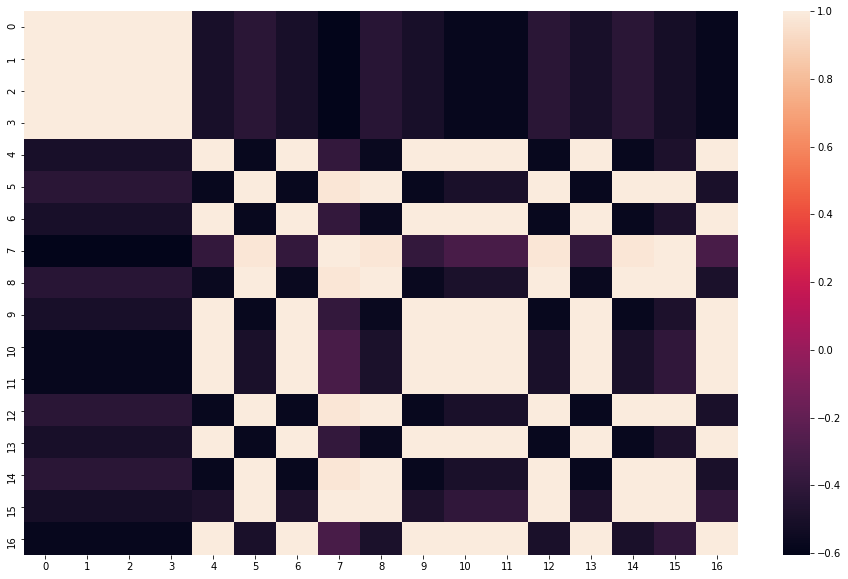

In [96]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr)

In [97]:
meeting_title = user_meeting_rating.columns
meeting_title_list = list(meeting_title)
coffey_hands = meeting_title_list.index(29723)

In [98]:
corr_coffey_hands = corr[coffey_hands]
recommend_list = list(meeting_title[(corr_coffey_hands >= 0.9)])

In [99]:
recommend_list

[29723, 50091, 65803, 93620]

In [123]:
for rid in recommend_list:
    print(meetings[meetings['meeting_id']==rid]['title'].values[0])

소중한 순간을 펜 드로잉으로 기록해요
V10클라이밍 - 장한평점
[3시간] 연기를 통한 힐링 #감정분출 #스피치 #주인공=나
[가정의달] 템프터 명동점에서 핸드드립을 재미있게 즐겨보아요~


## 한 사용자에게 개인 추천을 해주기

In [6]:
df_review.rename(columns={'meeting_id_id':'meeting_id', 'uid_id':'uid'}, inplace=True)

In [21]:
meetings = df_meeting[['meeting_id', 'title']]
reviews = df_review[['uid', 'meeting_id', 'score']]

In [22]:
ratings = pd.merge(meetings, reviews, on='meeting_id')
ratings

,meeting_id,title,uid,score
0,29723,소중한 순간을 펜 드로잉으로 기록해요,1,5.0
1,50091,V10클라이밍 - 장한평점,1,5.0
2,65803,[3시간] 연기를 통한 힐링 #감정분출 #스피치 #주인공=나,1,4.0
3,93620,[가정의달] 템프터 명동점에서 핸드드립을 재미있게 즐겨보아요~,1,4.0
4,93627,"내가 하고 싶은 일은 무엇일까? [취업, 미래, 퇴사, 진로, 이직]",3,4.0
5,93633,[6월까지 20% 할인] 원데이 k-pop 댄스 정복 팬시스튜디오,2,5.0
6,93640,나만의 고체 향수 만들기,3,3.0
7,93649,스쿼시 원포인트 레슨,4,1.0
8,93649,스쿼시 원포인트 레슨,2,4.0
9,93649,스쿼시 원포인트 레슨,5,2.0


In [23]:
df_user_meeting_ratings = ratings.pivot_table(
    'score',
    index = 'uid',
    columns = 'meeting_id'
).fillna(0)
df_user_meeting_ratings

meeting_id,29723,50091,65803,93620,93627,93633,93640,93649,94892,108150,108341,108375,108725,108928,109062,109791,109828
uid,,,,,,,,,,,,,,,,,
1,5.0,5.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,5.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,4.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [28]:
matrix = np.matrix(df_user_meeting_ratings)
user_ratings_mean = np.mean(matrix, axis=1)
matrix_user_mean = matrix - user_ratings_mean.reshape(-1, 1)

In [31]:
matrix

matrix([[5., 5., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 5., 0., 4., 5., 0., 0., 0., 4., 0., 4., 0.,
         0.],
        [0., 0., 0., 0., 4., 0., 3., 0., 0., 4., 0., 0., 0., 4., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 5., 4., 0., 0., 0., 0.,
         4.],
        [0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 3.,
         0.]])

In [38]:
pd.DataFrame(matrix_user_mean, columns=df_user_meeting_ratings.columns)

meeting_id,29723,50091,65803,93620,93627,93633,93640,93649,94892,108150,108341,108375,108725,108928,109062,109791,109828
0,3.941176,3.941176,2.941176,2.941176,-1.058824,-1.058824,-1.058824,-1.058824,-1.058824,-1.058824,-1.058824,-1.058824,-1.058824,-1.058824,-1.058824,-1.058824,-1.058824
1,-1.294118,-1.294118,-1.294118,-1.294118,-1.294118,3.705882,-1.294118,2.705882,3.705882,-1.294118,-1.294118,-1.294118,2.705882,-1.294118,2.705882,-1.294118,-1.294118
2,-0.882353,-0.882353,-0.882353,-0.882353,3.117647,-0.882353,2.117647,-0.882353,-0.882353,3.117647,-0.882353,-0.882353,-0.882353,3.117647,-0.882353,-0.882353,-0.882353
3,-0.823529,-0.823529,-0.823529,-0.823529,-0.823529,-0.823529,-0.823529,0.176471,-0.823529,-0.823529,4.176471,3.176471,-0.823529,-0.823529,-0.823529,-0.823529,3.176471
4,-0.411765,-0.411765,-0.411765,-0.411765,-0.411765,-0.411765,-0.411765,1.588235,1.588235,-0.411765,-0.411765,-0.411765,-0.411765,-0.411765,-0.411765,2.588235,-0.411765


In [39]:
U, sigma, Vt = svds(matrix_user_mean, k=3)

In [40]:
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(5, 3)
(3,)
(3, 17)


In [42]:
sigma = np.diag(sigma)
sigma

array([[7.57447724, 0.        , 0.        ],
       [0.        , 8.37017569, 0.        ],
       [0.        , 0.        , 9.6062187 ]])

In [46]:
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [54]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns=df_user_meeting_ratings.columns)
df_svd_preds

meeting_id,29723,50091,65803,93620,93627,93633,93640,93649,94892,108150,108341,108375,108725,108928,109062,109791,109828
0,4.852476,4.852476,4.071756,4.071756,-0.129773,-0.080117,0.139890,-0.214884,-0.190266,-0.129773,-0.203207,0.027210,0.125682,-0.129773,0.125682,0.783656,0.027210
1,-0.158466,-0.158466,0.047333,0.047333,-0.154788,4.705632,0.101542,4.002459,4.993060,-0.154788,-0.247373,-0.023792,3.938612,-0.154788,3.938612,1.301672,-0.023792
2,-0.183050,-0.183050,0.086613,0.086613,3.837722,-0.116383,3.169608,-0.247624,-0.219998,3.837722,-0.254513,0.029442,0.139946,3.837722,0.139946,1.009842,0.029442
3,-0.158699,-0.158699,0.071718,0.071718,-0.142435,-0.124516,0.141521,0.811764,-0.168348,-0.142435,4.776047,4.019515,0.099065,-0.142435,0.099065,0.927638,4.019515
4,0.061115,0.061115,0.116189,0.116189,0.129258,1.055056,0.181065,0.944654,1.110284,0.129258,0.226905,0.248821,0.911342,0.129258,0.911342,0.419327,0.248821


In [59]:
def recommend(df_svd_preds, uid, ori_meetings_df, ori_ratings_df, num_recommendations=5):
    sorted_user_predictions = df_svd_preds.iloc[uid].sort_values(ascending=False)
    user_data = ori_ratings_df[ori_ratings_df.uid == uid]
    user_history = user_data.merge(ori_meetings_df, on='meeting_id').sort_values(['score'], ascending=False)
    recommendations = ori_meetings_df[~ori_meetings_df['meeting_id'].isin(user_history['meeting_id'])]
    recommendations = recommendations.merge(pd.DataFrame(sorted_user_predictions).reset_index(), on='meeting_id')
    recommendations = recommendations.rename(columns={uid: 'Predictions'}).sort_values('Predictions', ascending=False).iloc[:num_recommendations, :]
    
    return user_history, recommendations

In [61]:
already_rated, predictions = recommend(df_svd_preds, 1, meetings, reviews, 10)

In [62]:
already_rated

,uid,meeting_id,score,title
0,1,29723,5.0,소중한 순간을 펜 드로잉으로 기록해요
1,1,50091,5.0,V10클라이밍 - 장한평점
2,1,65803,4.0,[3시간] 연기를 통한 힐링 #감정분출 #스피치 #주인공=나
3,1,93620,4.0,[가정의달] 템프터 명동점에서 핸드드립을 재미있게 즐겨보아요~


In [63]:
predictions

,meeting_id,title,Predictions
4,94892,마리에르 플라워 꽃다발 클래스,4.993060
1,93633,[6월까지 20% 할인] 원데이 k-pop 댄스 정복 팬시스튜디오,4.705632
3,93649,스쿼시 원포인트 레슨,4.002459
8,108725,송파 공기총 사격 (예약 가능),3.938612
10,109062,[소확행 5탄] 다이어리 가죽커버 만들기 (예약 가능),3.938612
11,109791,네트백 만들기 (예약 가능),1.301672
2,93640,나만의 고체 향수 만들기,0.101542
7,108375,소이캔들 만들기 35클래스 (예약 가능),-0.023792
12,109828,일상을 담은 데일리드로잉 : 취미미술,-0.023792
0,93627,"내가 하고 싶은 일은 무엇일까? [취업, 미래, 퇴사, 진로, 이직]",-0.154788


# K-Means Clustering

In [3]:
from sklearn.cluster import KMeans

In [ ]:
data = 

In [ ]:
model = KMeans(n_cluster=3)

# Big Five 추천

## 개인 mbti 검사

In [59]:
avg = {'openness': 67, 'conscientiousness': 64, 'extraversion': 60, 'agreeableness': 60, 'neuroticism': 55}
users = pd.merge(df_user, df_survey, on='uid')
mbti = []
users['avg_extraversion'] = avg['extraversion']
users['avg_openness'] = avg['openness']
users['avg_agreeableness'] = avg['agreeableness']
users['avg_conscientiousness'] = avg['conscientiousness']
for i, user in users.iterrows():
    temp = ''
    if user['extraversion'] < user['avg_extraversion']:
        temp += 'I'
    elif user['extraversion'] >= user['avg_extraversion']:
        temp += 'E'
    if user['openness'] < user['avg_openness']:
        temp += 'S'
    elif user['openness'] >= user['avg_openness']:
        temp += 'N'
    if user['agreeableness'] < user['avg_agreeableness']:
        temp += 'T'
    elif user['agreeableness'] >= user['avg_agreeableness']:
        temp += 'F'
    if user['conscientiousness'] < user['avg_conscientiousness']:
        temp += 'P'
    elif user['conscientiousness'] >= user['avg_conscientiousness']:
        temp += 'J'
    mbti.append(temp)
users['mbti'] = mbti
users.drop(['avg_extraversion', 'avg_openness', 'avg_agreeableness', 'avg_conscientiousness'], axis='columns', inplace=True)
users

,uid,ages,area1,area2,gender,is_inst,profile_image,username,year,survey_id,agreeableness,conscientiousness,extraversion,neuroticism,openness,mbti
0,1362679482,20,대전광역시,전체,2,0,https://img.pngio.com/deafult-profile-icon-png...,빈,1994,2,67,83,83,37,80,ENFJ
1,1363992434,20,대전광역시,유성구,1,0,http://k.kakaocdn.net/dn/bX8xJX/btqEuaJplOY/Zk...,대래,1993,103,77,63,93,23,80,ENFP
2,1366098022,20,대전광역시,전체,2,0,http://k.kakaocdn.net/dn/OMvjK/btqEuaiNnia/xZG...,안지연,1994,10,77,87,63,37,60,ESFJ
3,1367864624,20,대전광역시,유성구,1,0,http://k.kakaocdn.net/dn/oaRLn/btqDcRdKaiL/hzq...,SHT,1993,6,70,60,53,70,80,INFP
4,1369412523,20,대전광역시,중구,2,0,https://img.pngio.com/deafult-profile-icon-png...,김가은,1995,3,70,63,83,50,63,ESFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1378066775,20,부산광역시,북구,2,0,http://k.kakaocdn.net/dn/lupzD/btqEFEdIHcj/31o...,디듀,1994,105,67,60,80,67,53,ESFP
95,1378080663,20,서울특별시,강서구,2,0,http://k.kakaocdn.net/dn/ppOpR/btqEdsDYjka/ubH...,박선희,1995,106,40,40,70,80,93,ENTP
96,1378148508,20,경기도,성남시 분당구,2,0,http://k.kakaocdn.net/dn/EvQIg/btqEweeMpsQ/xp5...,정다은,1995,107,60,83,77,60,73,ENFJ
97,1378194077,20,전라북도,군산시,2,0,http://k.kakaocdn.net/dn/csCN1T/btqBO6RJJaj/oz...,신종,1993,108,73,80,43,53,77,INFJ


In [72]:
same_users = users[users['mbti']=='ENFP']
same_users

,uid,ages,area1,area2,gender,is_inst,profile_image,username,year,survey_id,agreeableness,conscientiousness,extraversion,neuroticism,openness,mbti
1,1363992434,20,대전광역시,유성구,1,0,http://k.kakaocdn.net/dn/bX8xJX/btqEuaJplOY/Zk...,대래,1993,103,77,63,93,23,80,ENFP
13,1375315530,20,서울특별시,은평구,1,0,http://k.kakaocdn.net/dn/b3lbZH/btqCYWVy1gL/Tn...,박상원,1993,21,67,63,63,50,70,ENFP
16,1375319162,20,대전광역시,중구,1,0,https://img.pngio.com/deafult-profile-icon-png...,김정원,1992,26,77,60,63,50,70,ENFP
23,1375321399,20,대전광역시,동구,2,0,http://k.kakaocdn.net/dn/6QuCg/btqDJfzspxq/RPQ...,이혜진,1994,30,73,50,80,60,80,ENFP
37,1375336702,20,경기도,용인시 수지구,1,0,https://img.pngio.com/deafult-profile-icon-png...,조원철,1993,43,73,57,90,43,73,ENFP
38,1375337204,20,충청북도,청주시 흥덕구,1,0,http://k.kakaocdn.net/dn/qaKBu/btqEk2Tv4dk/K3k...,우동균,1993,46,67,60,63,60,67,ENFP
67,1375444716,20,세종특별자치시,전체,2,0,http://k.kakaocdn.net/dn/qZSwH/btqEtO1cBYv/DAp...,홍주,1995,76,67,63,87,50,83,ENFP
69,1375467079,20,경기도,김포시,2,0,http://k.kakaocdn.net/dn/pUC1l/btqChSzc1Ud/U5b...,유선홍,1995,78,67,50,80,83,77,ENFP
79,1375628555,20,부산광역시,북구,2,0,http://k.kakaocdn.net/dn/byVB1u/btqAPPo1sWM/R5...,가영,1996,87,70,63,63,37,73,ENFP
89,1375816288,60,부산광역시,사상구,1,0,http://k.kakaocdn.net/dn/cIfXk5/btqwNW8rTxd/qu...,오해운,1959,98,70,57,80,60,70,ENFP


In [81]:
df_usermeeting[df_usermeeting['uid'].isin(users['uid'])]

,meeting_id,uid,is_active
0,9,1367864624,1
1,14,1367864624,1
2,42,1369412523,1
3,79,1367864624,1
4,351,1362679482,1
...,...,...,...
487,1027,1367864624,1
488,1028,1366098022,1
489,1028,1367864624,1
490,1030,1363992434,2
